In [ ]:
import os
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# load audio files with librosa
taylor_file = "/content/drive/MyDrive/taylor-original.wav"
scale, sr = librosa.load(taylor_file)#get a time series and a default sampling rate


In [ ]:
display(ipd.Audio(taylor_file))

**EXTRACTING SHORT TERM FOURIER TRANSFORM**

In [ ]:
FRAME_SIZE = 2048
HOP_SIZE = 512

In [ ]:
S_scale = librosa.stft(scale, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [ ]:
S_scale.shape
#First dimension is the frequency bin=(frame_size/2)+1 here frame_size=2048
#Second dimension is the number of frames

(1025, 25848)

In [ ]:
type(S_scale[0][0])#The type is a complex number

**CALCULATING THE SPECTROGRAM**

In [ ]:
Y_scale = np.abs(S_scale) ** 2
Y_scale.shape

In [ ]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y,
                             sr=sr,
                             hop_length=hop_length,
                             x_axis="time",
                             y_axis=y_axis,
                             cmap='viridis')
    plt.colorbar(format="%+2.f")

In [ ]:
plot_spectrogram(Y_scale, sr, HOP_SIZE)
plt.ylim(0, 1000)
plt.xlim(0,100)

In [ ]:
Y_log_scale = librosa.power_to_db(Y_scale)
plot_spectrogram(Y_log_scale, sr, HOP_SIZE)
plt.xlim(0,500)

In [ ]:
plot_spectrogram(Y_log_scale, sr, HOP_SIZE, y_axis="log")
plt.xlim(0,7)

**EXTRACTING MEL  SPECTROGRAMS**

In [ ]:
#MEL FILTER BANKS
filter_banks = librosa.filters.mel(n_fft=2048, sr=22050, n_mels=10)
filter_banks.shape

(10, 1025)

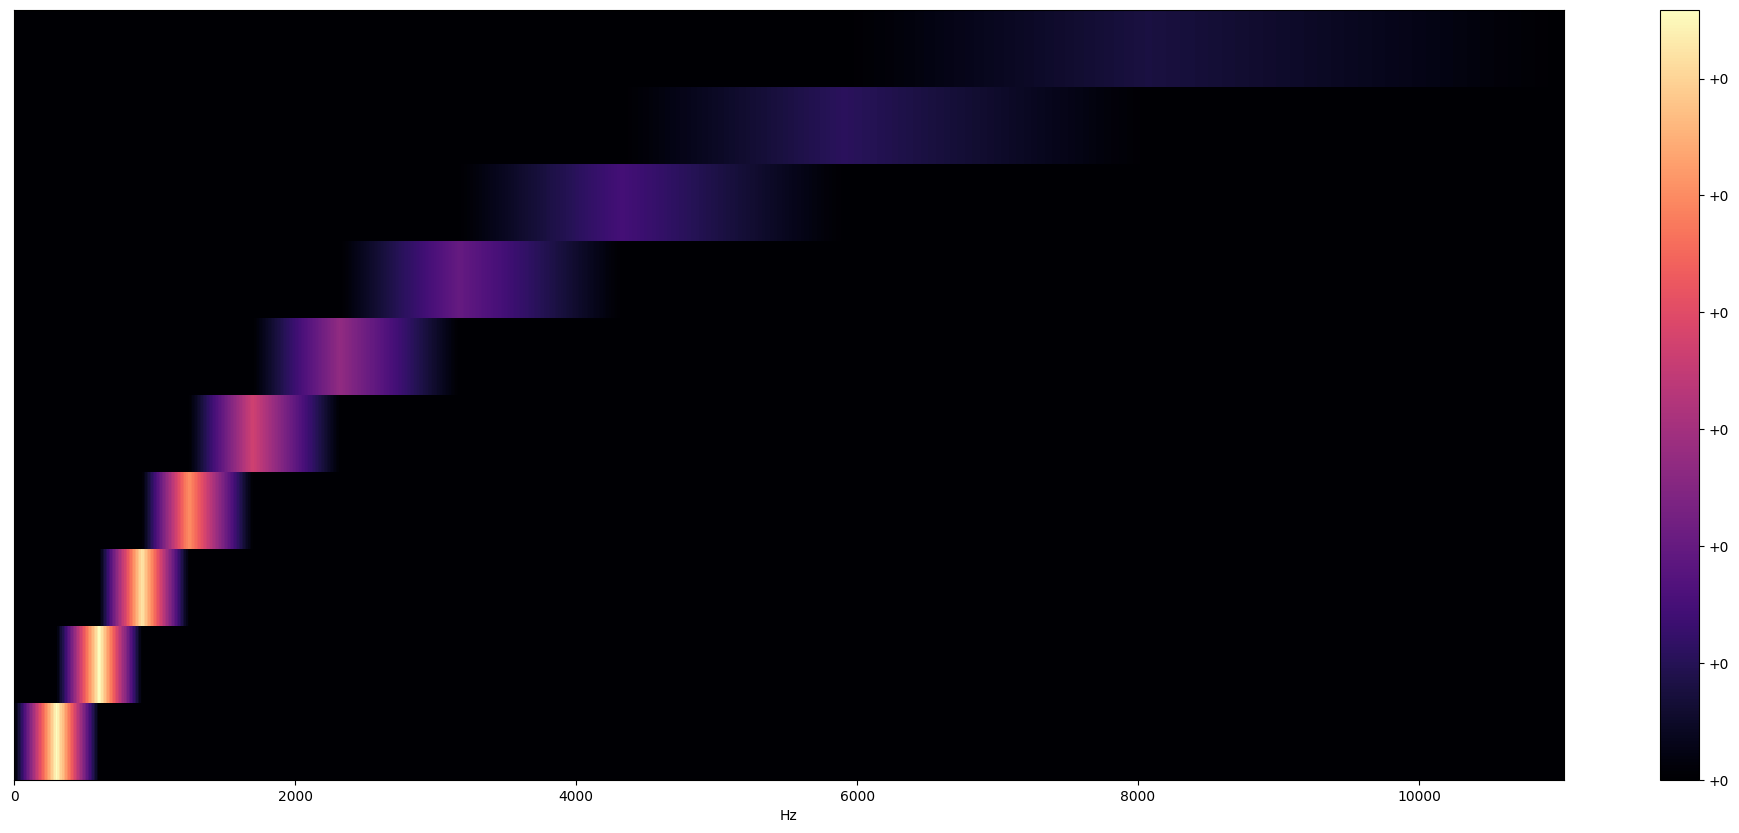

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(filter_banks,
                         sr=sr,
                         x_axis="linear")
plt.colorbar(format="%+2.f")
plt.show()

#x-axis=frequency, y-axis=mel frequency and we have 10
#The colors in one filter bank represents weight

**Extracting Mel Spectrogram**

In [ ]:
mel_spectrogram = librosa.feature.melspectrogram(y=scale, sr=sr, n_fft=2048, hop_length=512, n_mels=10)

mel_spectrogram.shape

(10, 25848)

In [ ]:
log_mel_spectrogram = librosa.power_to_db(mel_spectrogram)

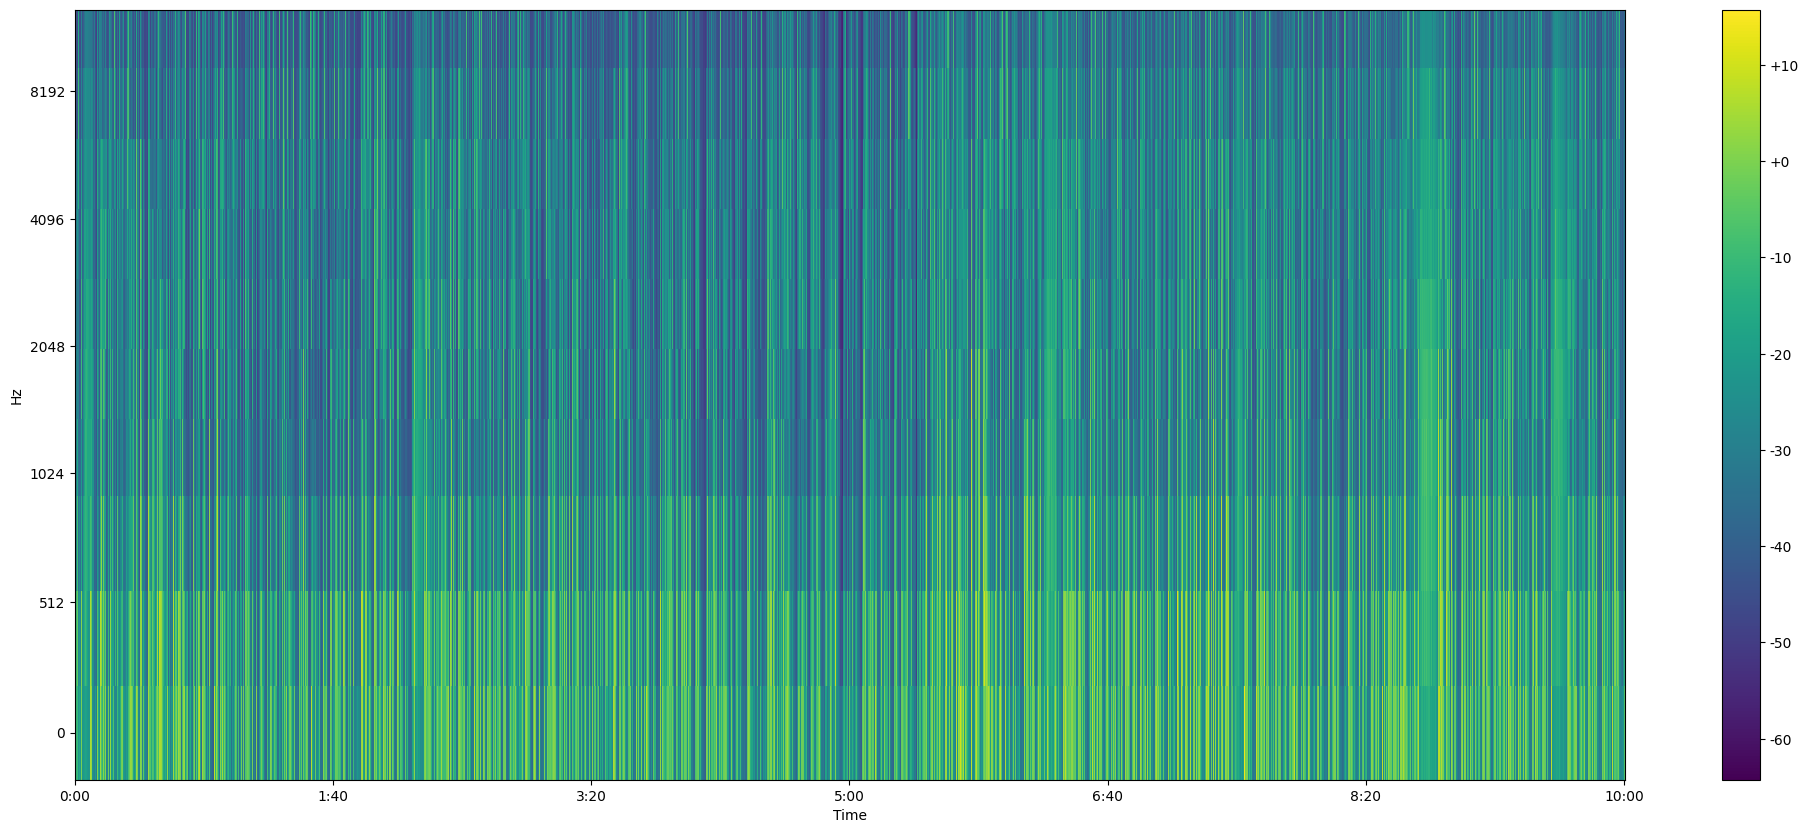

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spectrogram,
                         x_axis="time",
                         y_axis="mel",
                         sr=sr,
                         cmap='viridis')
plt.colorbar(format="%+2.f")
plt.show()

**EXTRACTING MFCCs**

In [ ]:
mfccs = librosa.feature.mfcc(y=scale, n_mfcc=20, sr=sr)
mfccs.shape

(20, 25848)

**Visualising MFCCs**

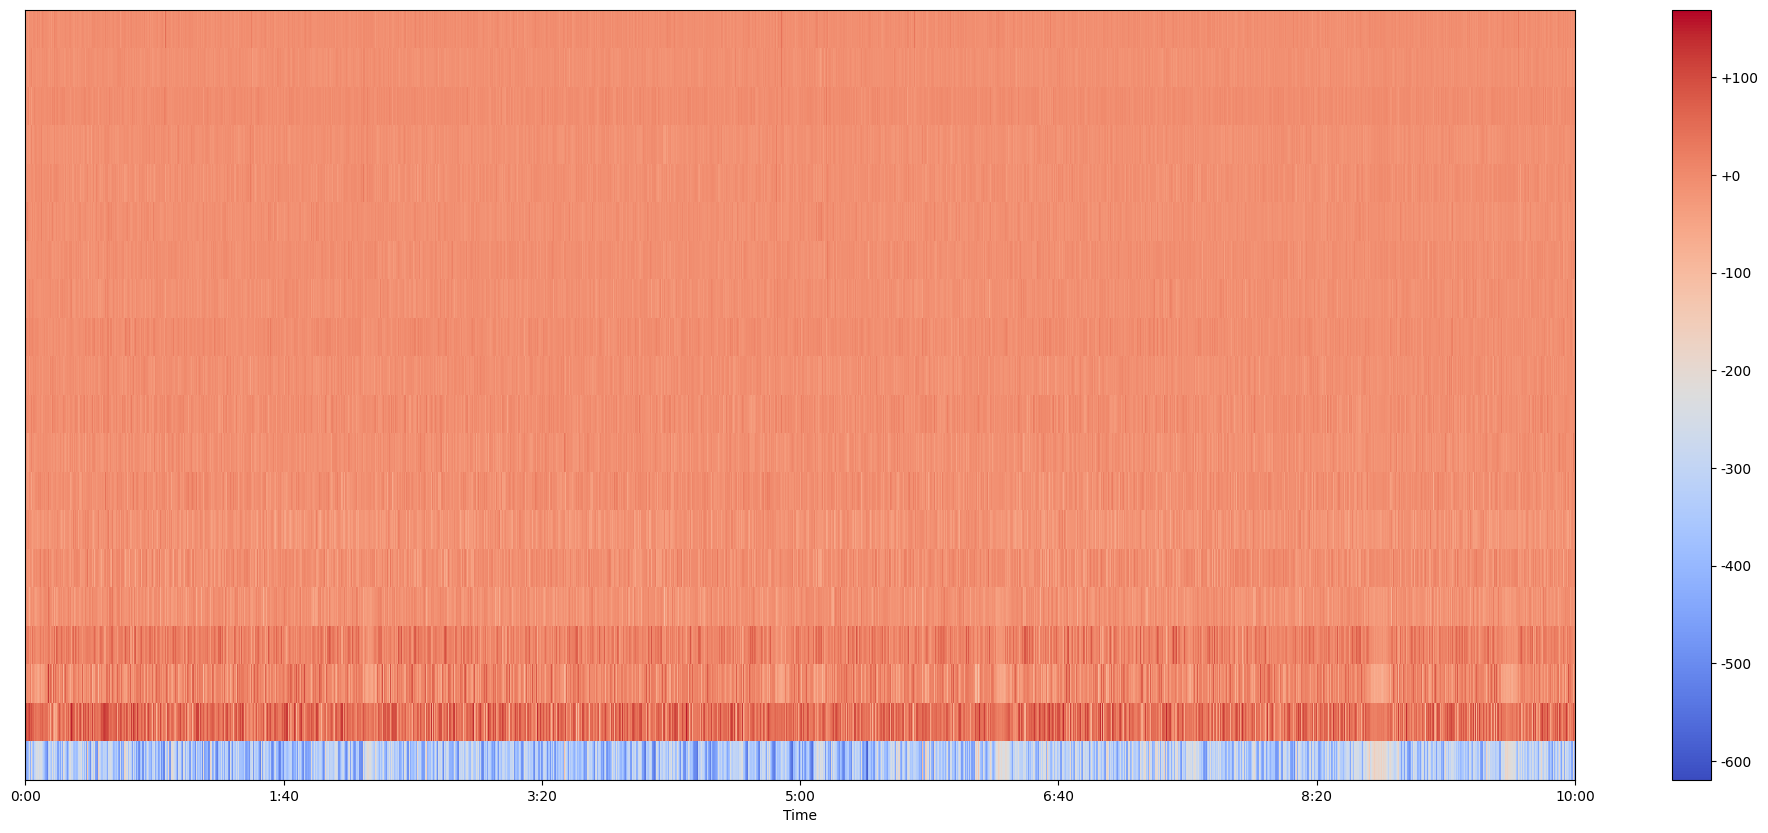

In [ ]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs,
                         x_axis="time",
                         sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [ ]:
mfccs_mean = np.mean(mfccs, axis=1)  # Calculate mean along the columns (axis=1)
mfccs_median = np.median(mfccs, axis=1)  # Calculate median along the columns (axis=1)
mfccs_std = np.std(mfccs, axis=1)  # Calculate standard deviation along the columns (axis=1)
print(mfccs_mean)
print(mfccs_median)
print(mfccs_std)


[-3.3835785e+02  4.0913731e+01 -1.3718471e-01  1.4077714e+01
 -1.5050439e+01 -9.3139915e+00 -1.7792356e+01 -8.8207350e+00
 -1.2171140e+01 -7.7644391e+00 -1.0446842e+01 -6.5759058e+00
 -1.0960004e+01 -9.3367691e+00 -1.1170306e+01 -1.0656804e+01
 -1.2174821e+01 -5.2845154e+00 -1.0997548e+01 -7.0357609e+00]
[-327.23346     42.734573     2.5602455   10.8398     -12.896676
   -6.1477766  -16.652073    -7.591341   -11.744648    -7.6335077
   -9.986249    -6.8737497  -10.373157    -8.978562   -11.585169
   -9.63022    -12.041185    -5.000781   -10.666628    -7.094401 ]
[86.40783   45.93743   34.779884  26.824337  16.729565  17.747246
 15.074172  13.541192  10.852589  11.318151   9.240623   8.751949
  8.607267   7.774633   7.6661224  8.273823   6.931051   6.2512717
  6.3705544  6.072445 ]


In [ ]:
zcr = librosa.feature.zero_crossing_rate(scale)
zcr.shape
zcr_mean = np.mean(zcr)
zcr_median = np.median(zcr)
zcr_std = np.std(zcr)
print(zcr_mean)
print(zcr_median)
print(zcr_std)

0.21608113342304047
0.1923828125
0.14423756534603305


In [ ]:
rms= librosa.feature.rms(y=scale, frame_length=FRAME_SIZE, hop_length=HOP_SIZE)
rms_mean = np.mean(rms)
rms_median = np.median(rms)
rms_std = np.std(rms)
print(rms_mean)
print(rms_median)
print(rms_std)

0.018578967
0.016686706
0.015948676


In [ ]:
chroma = librosa.feature.chroma_stft(y=scale, sr=sr)
# Flatten the chroma array to compute overall statistics
chroma_flat = chroma.flatten()

# Compute overall mean, median, and standard deviation
chroma_mean = np.mean(chroma_flat)
chroma_median = np.median(chroma_flat)
chroma_std = np.std(chroma_flat)
print(chroma_mean)
print(chroma_median)
print(chroma_std)

0.41556865
0.36369133
0.31743616


In [ ]:
spectral_centroids = librosa.feature.spectral_centroid(y=scale, sr=sr)
spectral_bandwidths = librosa.feature.spectral_bandwidth(y=scale, sr=sr)

# Calculate mean, median, and std of Spectral Centroid
centroid_mean = np.mean(spectral_centroids)
centroid_median = np.median(spectral_centroids)
centroid_std = np.std(spectral_centroids)

# Print the results
print("Spectral Centroid Mean:", centroid_mean)
print("Spectral Centroid Median:", centroid_median)
print("Spectral Centroid Standard Deviation:", centroid_std)

# Calculate mean, median, and std of Spectral Bandwidth
bandwidth_mean = np.mean(spectral_bandwidths)
bandwidth_median = np.median(spectral_bandwidths)
bandwidth_std = np.std(spectral_bandwidths)
print("Spectral Bandwidth Mean:", bandwidth_mean)
print("Spectral Bandwidth Median:", bandwidth_median)
print("Spectral Bandwidth Standard Deviation:", bandwidth_std)

Spectral Centroid Mean: 3474.7277093507764
Spectral Centroid Median: 3308.6772585564704
Spectral Centroid Standard Deviation: 1440.9906077753178
Spectral Bandwidth Mean: 2605.088427882097
Spectral Bandwidth Median: 2601.368591063343
Spectral Bandwidth Standard Deviation: 435.1771193194608


In [ ]:
rolloff = librosa.feature.spectral_rolloff(y=scale, sr=sr, roll_percent=0.85)

# Calculate mean, median, and std of Spectral Rolloff
rolloff_mean = np.mean(rolloff)
rolloff_median = np.median(rolloff)
rolloff_std = np.std(rolloff)

# Print the results
print("Spectral Rolloff Mean:", rolloff_mean)
print("Spectral Rolloff Median:", rolloff_median)
print("Spectral Rolloff Standard Deviation:", rolloff_std)

Spectral Rolloff Mean: 6281.892977318724
Spectral Rolloff Median: 6524.560546875
Spectral Rolloff Standard Deviation: 1957.0786590898717


In [ ]:
import librosa
import numpy as np
import pandas as pd

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=scale, sr=sr, n_mfcc=20)

mfcc_data = {
    "MFCC": [f"MFCC_{i+1}" for i in range(20)],
    "Mean": [np.mean(mfccs[i]) for i in range(20)],
    "Median": [np.median(mfccs[i]) for i in range(20)],
    "Std": [np.std(mfccs[i]) for i in range(20)]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(mfcc_data)

# Write the DataFrame to an Excel file
df.to_excel("mfcc_features.xlsx", index=False)

# Write the DataFrame to an Excel file
df.to_excel("mfcc_features.xlsx", index=False)

print("MFCC features have been written to mfcc_features.xlsx")


MFCC features have been written to mfcc_features.xlsx


In [ ]:
chroma_stft = librosa.feature.chroma_stft(y=scale, sr=sr)

# Initialize a dictionary to store Chroma STFT statistics
chroma_data = {
    "Chroma Bin": [f"Chroma_{i+1}" for i in range(chroma_stft.shape[0])],
    "Mean": [np.mean(chroma_stft[i]) for i in range(chroma_stft.shape[0])],
    "Median": [np.median(chroma_stft[i]) for i in range(chroma_stft.shape[0])],
    "Std": [np.std(chroma_stft[i]) for i in range(chroma_stft.shape[0])]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(chroma_data)

# Write the DataFrame to an Excel file
df.to_excel("chroma_stft_features.xlsx", index=False)

In [ ]:
import librosa
import numpy as np
import pandas as pd

# Load the audio file
audio_path = "/content/drive/MyDrive/trump-original.wav"
y, sr = librosa.load(audio_path)

# Extract various audio features
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
rms = librosa.feature.rms(y=y)
zcr = librosa.feature.zero_crossing_rate(y=y)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

# Initialize a dictionary to store feature statistics
feature_data = {
    "Feature": [],
    "Mean": [],
    "Median": [],
    "Std": []
}

# Function to compute statistics and add to dictionary
def add_feature_stats(feature_name, feature_values):
    feature_flat = feature_values.flatten()
    feature_data["Feature"].append(feature_name)
    feature_data["Mean"].append(np.mean(feature_flat))
    feature_data["Median"].append(np.median(feature_flat))
    feature_data["Std"].append(np.std(feature_flat))

# Compute statistics for each feature
add_feature_stats("Chroma", chroma)
add_feature_stats("RMS", rms)
add_feature_stats("ZCR", zcr)
add_feature_stats("Spectral Rolloff", rolloff)
add_feature_stats("Spectral Centroid", centroid)
add_feature_stats("Spectral Bandwidth", bandwidth)
for i in range(mfccs.shape[0]):
    add_feature_stats(f"MFCC_{i+1}", mfccs[i])

# Create a DataFrame from the dictionary
df = pd.DataFrame(feature_data)

# Write the DataFrame to an Excel file
df.to_excel("audio_features_statistics.xlsx", index=False)

print("Audio features statistics have been written to audio_features_statistics.xlsx")


Audio features statistics have been written to audio_features_statistics.xlsx
